<a href="https://colab.research.google.com/github/aiscience-22/UA_War/blob/machine_learning_0.02/Twitter_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
spark_version = 'spark-3.2.2'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
#!apt-get update
#!apt-get install openjdk-11-jdk-headless -qq > /dev/null
#!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
#!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
#!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

# Read the CSV and Perform Basic Data Cleaning

In [11]:
# Read in data from S3 Buckets
from pyspark import SparkFiles
url ="https://uaresources.s3.us-west-1.amazonaws.com/joined.csv"

spark.sparkContext.addFile(url)
joined_data_df = spark.read.csv(SparkFiles.get("joined.csv"), sep=",", header=True, inferSchema=True)


# Show DataFrame
joined_data_df.show()

+----------+--------------------+--------+------+
|      date|                text|negative|weight|
+----------+--------------------+--------+------+
|2022-08-06| the catastrophic...|    null|  null|
|2022-08-06| once again hits ...|    null|  null|
|2022-08-06|on the night of m...|    null|  null|
|2022-08-06|global food crisi...|    null|  null|
|2022-08-06| the catastrophic...|    null|  null|
|2022-08-06| the catastrophic...|    null|  null|
|2022-08-06|also a shell hit ...|    null|  null|
|2022-08-06|a cute ukrainian ...|    null|  null|
|2022-08-06|please stop bombi...|    null|  null|
|2022-08-06|expecting to capi...|    null|  null|
|2022-08-06|singer meriem ger...|    null|  null|
|2022-08-06|young lives cut s...|    null|  null|
|2022-08-06|ukrainian landmin...|    null|  null|
|2022-08-06|    ciainspired lies|    null|  null|
|2022-08-06|lidievka occupied...|    null|  null|
|2022-08-06|amnesty internati...|    null|  null|
|2022-08-06|commander in char...|    null|  null|


In [12]:
# Show the end of DataFrame
joined_data_df.tail(10) 

[Row(date='2022-08-06', text='makeshift communication station kherson russians using civilians as cover ', negative=None, weight=None),
 Row(date='2022-08-06', text='sony interactive entertainment suspends deliveries to the russian federation and the operation of the playstation store', negative=None, weight=None),
 Row(date='2022-08-06', text='the american company caterpillar inc one of the worlds largest manufacturers of construction and mining equipment is leaving russia', negative=None, weight=None),
 Row(date='2022-08-06', text='locals report several explosions in the vicinity of occupied skadovsk oblast', negative=None, weight=None),
 Row(date='2022-08-06', text='icymi tracking the faceless killers who mutilated and executed a ukrainian pow this article contains descriptions of sexual violence and murder which readers may find disturbing via', negative=None, weight=None),
 Row(date='2022-08-06', text='on the avenue of the th anniversary of kherson russian soldiers on the top floo

In [13]:
# convert spark dataframe to pandas
joined_data_df = joined_data_df.toPandas()
print(joined_data_df)




               date                                               text  \
0        2022-08-06   the catastrophic explosion of a russian tank ...   
1        2022-08-06   once again hits near the water handling facility   
2        2022-08-06  on the night of march  the village of slobozha...   
3        2022-08-06      global food crisis fact sheet updated august    
4        2022-08-06   the catastrophic explosion of a russian tank ...   
...             ...                                                ...   
1195538  2022-08-06  on the avenue of the th anniversary of kherson...   
1195539  2022-08-06  lets show ukraine how much solidarity we have ...   
1195540  2022-08-06  new officials confirmed on august that handed ...   
1195541  2022-08-06  president held talks with president of  joint ...   
1195542  2022-08-06  i hope nowadays everyone thinks twice before d...   

         negative  weight  
0             NaN     NaN  
1             NaN     NaN  
2             NaN     NaN  

In [14]:
# convert text to text lenght
joined_data_df['text_length']  = joined_data_df['text'].str.len()

joined_data_df.head()

,date,text,negative,weight,text_length
0,2022-08-06,the catastrophic explosion of a russian tank ...,NaN,NaN,100
1,2022-08-06,once again hits near the water handling facility,NaN,NaN,49
2,2022-08-06,on the night of march the village of slobozha...,NaN,NaN,199
3,2022-08-06,global food crisis fact sheet updated august,NaN,NaN,45
4,2022-08-06,the catastrophic explosion of a russian tank ...,NaN,NaN,100


In [15]:
joined_data_df.tail()

,date,text,negative,weight,text_length
1195538,2022-08-06,on the avenue of the th anniversary of kherson...,NaN,NaN,207
1195539,2022-08-06,lets show ukraine how much solidarity we have ...,NaN,NaN,121
1195540,2022-08-06,new officials confirmed on august that handed ...,NaN,NaN,182
1195541,2022-08-06,president held talks with president of joint ...,NaN,NaN,222
1195542,2022-08-06,i hope nowadays everyone thinks twice before d...,NaN,NaN,173


In [16]:
joined_data_df.sample()

,date,text,negative,weight,text_length
761152,2022-08-02,pla aircraft j118 j1610 kj500 aewc y9 ew and y...,NaN,0.5,143


In [17]:
# Drop the columns with text values
joined_data_df.drop("text", axis=1, inplace=True)
# joined_data_df.drop("event", axis=1, inplace=True)

joined_data_df.head()

,date,negative,weight,text_length
0,2022-08-06,NaN,NaN,100
1,2022-08-06,NaN,NaN,49
2,2022-08-06,NaN,NaN,199
3,2022-08-06,NaN,NaN,45
4,2022-08-06,NaN,NaN,100


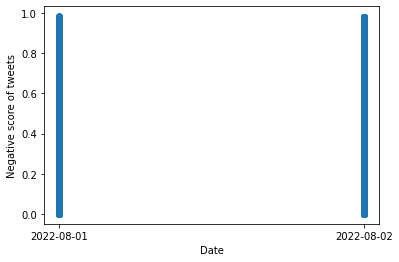

In [18]:
# Get the plot by timeline

plt.scatter(joined_data_df.date, joined_data_df.negative)
plt.xlabel('Date')
plt.ylabel('Negative score of tweets')
plt.show()

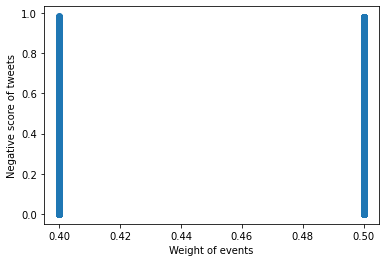

In [19]:
# Get the plot by weight of event
plt.scatter(joined_data_df.weight, joined_data_df.negative)
plt.xlabel('Weight of events')
plt.ylabel('Negative score of tweets')
plt.show()

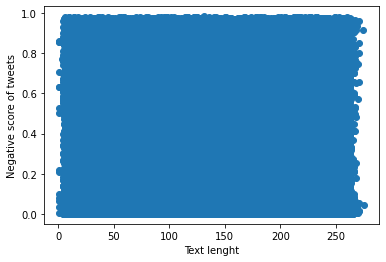

In [20]:
#Get the plot by length of tweet
plt.scatter(joined_data_df.text_length, joined_data_df.negative)
plt.xlabel('Text lenght')
plt.ylabel('Negative score of tweets')
plt.show()

In [21]:
# Drop the date column
joined_data_df.drop("date", axis=1, inplace=True)


# convert datetime to numerical
# importing the datetime module
# import datetime as dt
# joined_data_df['date'] = pd.to_datetime(joined_data_df['date'])
# joined_data_df['date'] = joined_data_df['date'].map(dt.datetime.toordinal)

In [22]:
joined_data_df.head()

,negative,weight,text_length
0,NaN,NaN,100
1,NaN,NaN,49
2,NaN,NaN,199
3,NaN,NaN,45
4,NaN,NaN,100


In [23]:
joined_data_df.sample()

,negative,weight,text_length
1053109,NaN,NaN,76


In [24]:
joined_data_df.tail()

,negative,weight,text_length
1195538,NaN,NaN,207
1195539,NaN,NaN,121
1195540,NaN,NaN,182
1195541,NaN,NaN,222
1195542,NaN,NaN,173


In [25]:
# Drop the null rows
joined_data_df = joined_data_df.dropna()

In [26]:
# get the shape of the new DataFrame
print(f"{joined_data_df.shape[0]} rows and {joined_data_df.shape[1]} columns")

124484 rows and 3 columns


In [27]:
joined_data_df.head()

,negative,weight,text_length
531025,0.602712,0.4,73
531026,0.212250,0.4,108
531027,0.490130,0.4,112
531028,0.876023,0.4,130
531029,0.044509,0.4,128


In [28]:
joined_data_df.tail()

,negative,weight,text_length
655704,0.056603,0.5,166
655705,0.584974,0.5,166
655706,0.584974,0.5,71
655707,0.584974,0.5,166
655708,0.584974,0.5,166


In [29]:
joined_data_df.sample()

,negative,weight,text_length
641945,0.001772,0.4,150


# Linear regression


We assume that we can predict emotional importance of the events of war by the sentiment analysis of tweets. For first segment we use for that simple linear regression, but at the next segment we could try to make clasterisation for Twitter users for more accurate trend prediction.

Our mockup dataset has data for two days only from 180 days of war yet. This is due to the duration of the calculation of sentiment analysis data: even for that two days it took 6 hours to get the result due to size of twitter data.

In [30]:
# Format the data to meet the requirements of the Scikit-learn library
# Examine the first five entries in X
X = joined_data_df.negative.values.reshape(-1, 1)
X[:5]

array([[0.60271168],
       [0.21225016],
       [0.4901295 ],
       [0.87602282],
       [0.04450933]])

In [31]:
# What is the shape of X - rows and columns
X.shape

(124484, 1)

In [32]:
# Assign the target variable, or the Weight column, to y. 
# It's possible to reshape this column, as we did with X, it's not required in this instance
y = joined_data_df.weight
y[:5]

531025    0.4
531026    0.4
531027    0.4
531028    0.4
531029    0.4
Name: weight, dtype: float64

In [33]:
# What is the shape of y - rows and columns
y.shape

(124484,)

In [40]:
# Create an instance of the linear regression model
# That will analyze the data and store information specific to this dataset
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [41]:
# Generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(124484,)


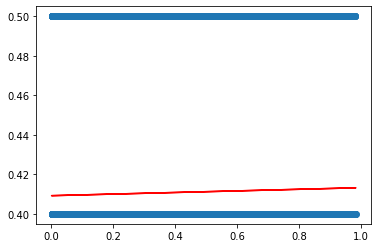

In [42]:
# Plot the predictions as a red line against the data points
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [43]:
# Examine the specific parameters of our model: the slope and the y-intercept
print(model.coef_)
print(model.intercept_)

[0.00404021]
0.4092276141226511
